In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import quandl
from datetime import datetime

In [2]:
ticker = 'GOOG'
try:
    # Reading data from pandas datareader
    df = pdr.get_data_yahoo(ticker, start = datetime(2004, 8, 19), end = datetime.today())

    # Writing the data into a CSV, in case API read fails
    df.to_csv('Datasets/' + ticker + '.csv')
except:
    df = pd.read_csv('Datasets/' + ticker + '.csv', index_col = 'Date', parse_dates = True)

In [3]:
# Earliest 5 rows
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-23,1146.900024,1131.800049,1144.000000,1146.209961,1093700.0,1146.209961
2019-07-24,1144.000000,1126.989990,1131.900024,1137.810059,1589800.0,1137.810059
2019-07-25,1141.699951,1120.920044,1137.819946,1132.119995,2209800.0,1132.119995
2019-07-26,1265.550049,1224.000000,1224.040039,1250.410034,4803900.0,1250.410034
2019-07-29,1247.369995,1228.229980,1241.050049,1236.550049,1628687.0,1236.550049


In [4]:
# Latest 5 rows
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3761.000000,3761.000000,3761.000000,3761.000000,3.761000e+03,3761.000000
mean,472.005962,463.288459,467.800299,467.747445,7.255637e+06,467.747445
std,319.657944,314.652074,317.162984,317.318517,8.133457e+06,317.318517
min,50.680038,47.800831,49.409801,49.818268,7.900000e+03,49.818268
25%,237.509750,232.478607,235.188461,234.934402,1.883200e+06,234.934402
50%,313.519836,308.832428,311.153717,310.969421,4.577800e+06,310.969421
75%,689.400024,673.260010,678.969971,682.739990,9.418000e+06,682.739990
max,1289.270020,1266.295044,1274.000000,1287.579956,8.254150e+07,1287.579956


In [6]:
# Sampling the data month-wise
mw = df.resample('M').mean().reset_index()
mw['Date'] = mw['Date'].apply(lambda date: f'{date.year}-{date.month}')
mw.set_index('Date', inplace = True)
mw.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-8,53.797798,51.334253,52.502651,52.434573,1.491568e+07,52.434573
2004-9,57.245667,55.271401,55.779497,56.402162,1.016682e+07,56.402162
2004-10,77.978432,74.410615,75.960519,76.329374,2.457433e+07,76.329374
2004-11,90.639783,86.757195,88.750200,88.416214,2.653653e+07,88.416214
2004-12,91.655997,89.427305,90.359719,90.545612,1.326237e+07,90.545612


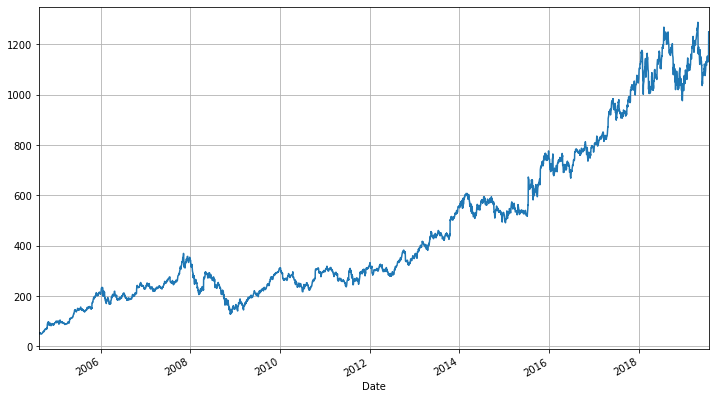

In [7]:
# Plotting closing prices
df['Close'].plot(grid = True, figsize = (12, 7))
plt.plot()
plt.show()

In [8]:
# Daily percentage change
daily_pct_change = df['Adj Close'].pct_change().fillna(0)
# Another method
# daily_pct_change = (df['Adj Close'] - df['Adj Close'].shift()) / df['Adj Close'].shift()

# Daily log returns
daily_log_returns = np.log(daily_pct_change)

/home/kartik/Documents/Python/SMA Crossover Project/smaenv/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kartik/Documents/Python/SMA Crossover Project/smaenv/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
# Monthly percentage change
monthly = df.resample(rule = 'M').mean().pct_change()

In [10]:
# Quarter percentage change
quarterly = df.resample(rule = '4M').mean().pct_change()

[]

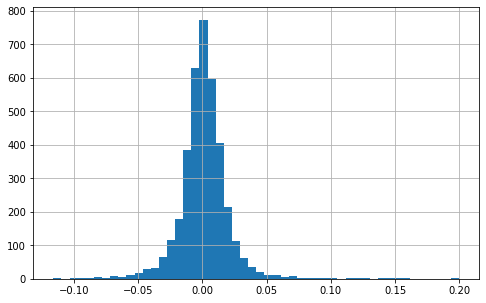

In [11]:
# Daily percentage change is normally distributed and most of the changes in the proximity of 0
daily_pct_change.hist(bins = 50, figsize = (8, 5))
plt.plot()

# Cumulative daily rate of return
The cumulative daily rate of return is useful to determine the value of an investment at regular intervals.
You can calculate the cumulative daily rate of return by using the daily percentage change values, adding 1 to
them and calculating the cumulative product with the resulting values

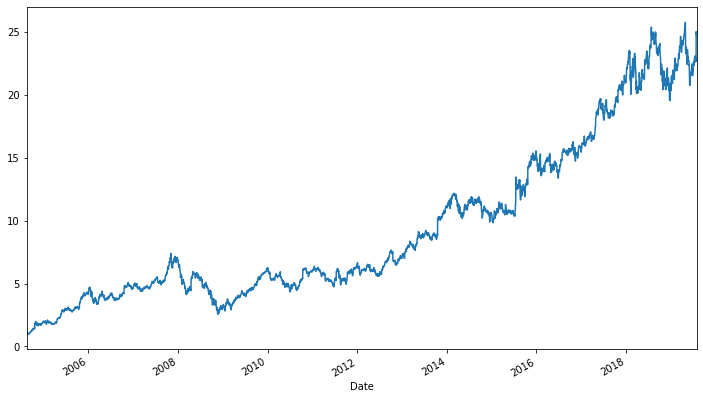

In [12]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.plot(figsize = (12, 7))
plt.show()

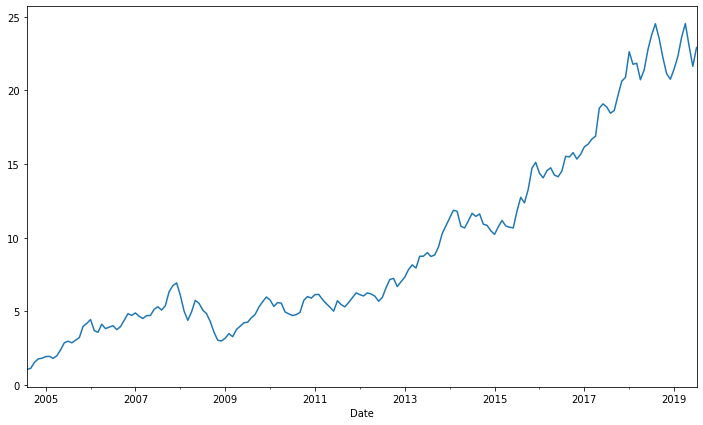

In [13]:
# Cumulative monthly returns
cum_monthly_returns = cum_daily_return.resample(rule = 'M').mean()
cum_monthly_returns.plot(figsize = (12, 7))
plt.show()

In [14]:
# Function to get multiple stock data
def get(tickers, start, end):
    def data(ticker):
        return pdr.get_data_yahoo(ticker, start = start, end = end)
    return pd.concat(map(data, tickers), keys = tickers, names = ['Ticker', 'Date'])

In [15]:
data_list = get(tickers = ['AAPL', 'GOOG', 'MSFT', 'IBM'], start = datetime(2010, 1, 1), end = datetime.today())
data_list.head()

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/AAPL/history?period1=1262298600&period2=1564525799&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f6d7df70be0>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [16]:
daily_adj_close = data_list['Adj Close'].reset_index().pivot(index = 'Date',
                                                             columns = 'Ticker',
                                                             values = 'Adj Close')
daily_adj_close.head()

NameError: name 'data_list' is not defined

In [17]:
# Daily percentage change for each stock
daily_pct_change = daily_adj_close.pct_change()
daily_pct_change.hist(figsize = (15, 10), bins = 50, sharex = True, sharey = True)
plt.show()

NameError: name 'daily_adj_close' is not defined

In [18]:
# Scatter plot of daily adj close for all stocks
sns.pairplot(daily_adj_close, diag_kind = 'kde')
# Another way
# pd.plotting.scatter_matrix(daily_adj_close, figsize = (15, 10), alpha = 0.1, diagonal = 'kde')
plt.show()

NameError: name 'daily_adj_close' is not defined

# Moving Windows
Moving windows are there when you compute the statistic on a window of data represented by a particular
period of time and then slide the window across the data by a specified interval. That way, the statistic
is continually calculated as long as the window falls first within the dates of the time series.

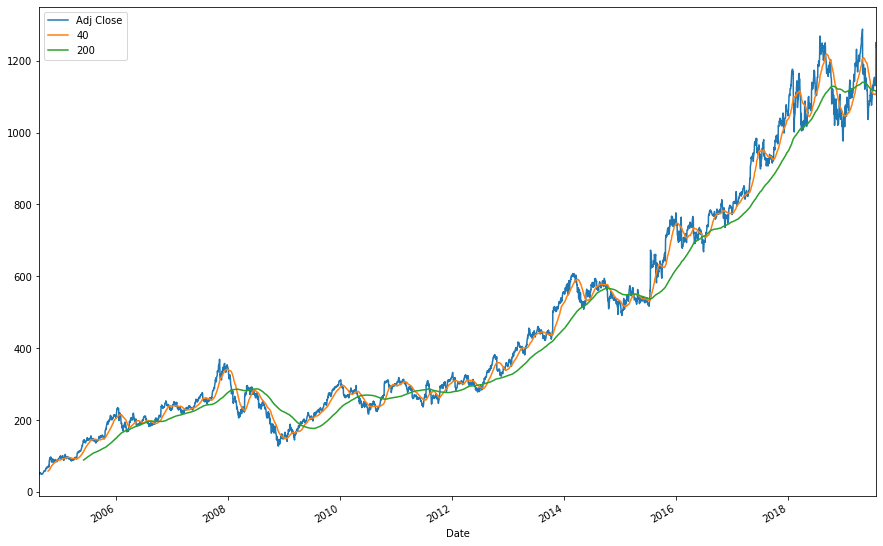

In [19]:
short_window = 40
long_window = 200

# Short and long moving windows rolling mean
df[f'{short_window}'] = df['Adj Close'].rolling(window = short_window).mean()
df[f'{long_window}'] = df['Adj Close'].rolling(window = long_window).mean()

# Plot adjusted close price, short and long windows rolling means
df[['Adj Close', f'{short_window}', f'{long_window}']].plot(figsize = (15, 10))
plt.show()

# Volatility of a stock
The volatility of a stock is a measurement of the change in variance in the returns of a stock over a
specific period of time. It is common to compare the volatility of a stock with another stock to get a
feel for which may have less risk or to a market index to examine the stock’s volatility in the overall
market. Generally, the higher the volatility, the riskier the investment in that stock, which results in
investing in one over another.

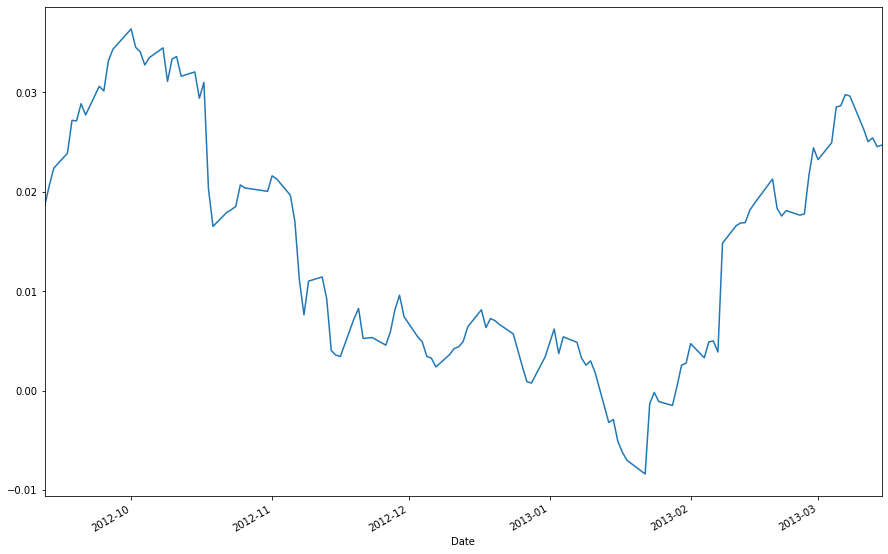

In [20]:
min_periods = 75
x = np.random.randint(1, daily_pct_change.shape[0] - 200)
vol = daily_pct_change[x:x+200].rolling(window = min_periods).mean().dropna(how = 'all') * np.sqrt(min_periods)
vol.plot(figsize = (15, 10))
plt.show()

# Ordinary Least-Squares Regression (OLS)
In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being predicted) in the given dataset and those predicted by the linear function.

# Note: Values not updated with current results.

- The number of observations (No. Observations). Note that you could also derive this with the Pandas package by using the info() function. Run return_data.info() in the IPython console of the DataCamp Light chunk above to confirm this.
- The degree of freedom of the residuals (DF Residuals)
- The number of parameters in the model, indicated by DF Model; Note that the number doesn’t include the constant term X which was defined in the code above.

## This was basically the whole left column that you went over. The right column gives you some more insight into the goodness of the fit. You see, for example:

- R-squared, which is the coefficient of determination. This score indicates how well the regression line approximates the real data points. In this case, the result is 0.280. In percentages, this means that the score is at 28%. When the score is 0%, it indicates that the model explains none of the variability of the response data around its mean. Of course, a score of 100% indicates the opposite.
- You also see the Adj. R-squared score, which at first sight gives the same number. However, the calculation behind this metric adjusts the R-Squared value based on the number of observations and the degrees-of-freedom of the residuals (registered in DF Residuals). The adjustment in this case hasn’t had much effect, as the result of the adjusted score is still the same as the regular R-squared score.
- The F-statistic measures how significant the fit is. It is calculated by dividing the mean squared error of the model by the mean squared error of the residuals. The F-statistic for this model is 514.2.
- Next, there’s also the Prob (F-statistic), which indicates the probability that you would get the result of the F-statistic, given the null hypothesis that they are unrelated.
- The Log-likelihood indicates the log of the likelihood function, which is, in this case 3513.2.
- The AIC is the Akaike Information Criterion: this metric adjusts the log-likelihood based on the number of observations and the complexity of the model. The AIC of this model is -7022.
- Lastly, the BIC or the Bayesian Information Criterion, is similar to the AIC that you just have seen, but it penalizes models with more parameters more severely. Given the fact that this model only has one parameter (check DF Model), the BIC score will be the same as the AIC score.

## Below the first part of the model summary, you see reports for each of the model’s coefficients:

- The estimated value of the coefficient is registered at coef.
- std err is the standard error of the estimate of the coefficient.
- There’s also the t-statistic value, which you’ll find under t. This metric is used to measure how statistically significant a coefficient is.
- P > |t| indicates the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response. In this case, you see that the constant has a value of 0.198, while AAPL is set at 0.000.

- Lastly, there is a final part of the model summary in which you’ll see other statistical tests to assess the distribution of the residuals:

- Omnibus, which is the Omnibus D’Angostino’s test: it provides a combined statistical test for the presence of skewness and kurtosis.
- The Prob(Omnibus) is the Omnibus metric turned into a probability.
- Next, the Skew or Skewness measures the symmetry of the data about the mean.
- The Kurtosis gives an indication of the shape of the distribution, as it compares the amount of data close to the mean with those far away from the mean (in the tails).
- Durbin-Watson is a test for the presence of autocorrelation, and the Jarque-Bera is another test of the skewness and kurtosis. You can also turn the result of this test into a probability, as you can see in Prob (JB).
- Lastly, you have the Cond. No, which tests the multicollinearity.

In [21]:
import statsmodels.api as sm

# Isolate adjusted closing prices
all_adj_close = data_list[['Adj Close']]

# Log returns
all_log_returns = np.log(all_adj_close / all_adj_close.shift())

aapl = all_log_returns[all_log_returns.index.get_level_values('Ticker') == 'AAPL'].droplevel('Ticker')
msft = all_log_returns[all_log_returns.index.get_level_values('Ticker') == 'MSFT'].droplevel('Ticker')
returns = pd.concat([aapl, msft], axis = 1)[1:]
returns.columns = ['AAPL', 'MSFT']
X = sm.add_constant(returns['AAPL'])
model = sm.OLS(returns['MSFT'], X).fit()
model.summary()

NameError: name 'data_list' is not defined

NameError: name 'returns' is not defined

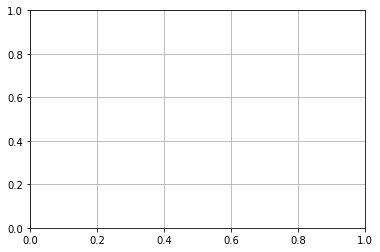

In [22]:
# Visualizing OLS
plt.grid(True)
plt.scatter(returns['AAPL'], returns['MSFT'], s = 2.5 ** 2)
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft Returns')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, color = 'red')
plt.show()

In [23]:
X = returns['AAPL'].values.reshape(-1, 1)
y = returns['MSFT'].values

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

plt.grid(True)
plt.scatter(X, y, marker = '.', s = 5 ** 2)
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
# regressor.intercept_: b0
# regressor.coef_: b1
plt.plot(x, regressor.intercept_ + regressor.coef_ * x, color = 'red')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft Returns')
plt.show()

NameError: name 'returns' is not defined

In [24]:
# Initialize short and long windows
short_window = 40
long_window = 100

# Initialize signals DataFrame with Signal column having values 0
signals = pd.DataFrame(data = 0, index = df.index, columns = ['Signal'])

# Create short and long moving averages columns
signals['Short Moving Average'] = df['Close'].rolling(window = short_window,
                                                      min_periods = 1, center = False).mean()
signals['Long Moving Average'] = df['Close'].rolling(window = long_window, min_periods = 1, center = False).mean()

# Create signals
signals['Signal'][short_window:] = np.where(signals['Short Moving Average'][short_window:] >
                             signals['Long Moving Average'][short_window:], 1, 0)

# Trading orders
signals['Positions'] = signals['Signal'].diff()

signals.head()

/home/kartik/Documents/Python/SMA Crossover Project/smaenv/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Signal,Short Moving Average,Long Moving Average,Positions
Date,,,,
2004-08-19,0,49.982655,49.982655,NaN
2004-08-20,0,51.967712,51.967712,0.0
2004-08-23,0,52.810387,52.810387,0.0
2004-08-24,0,52.667588,52.667588,0.0
2004-08-25,0,52.694488,52.694488,0.0


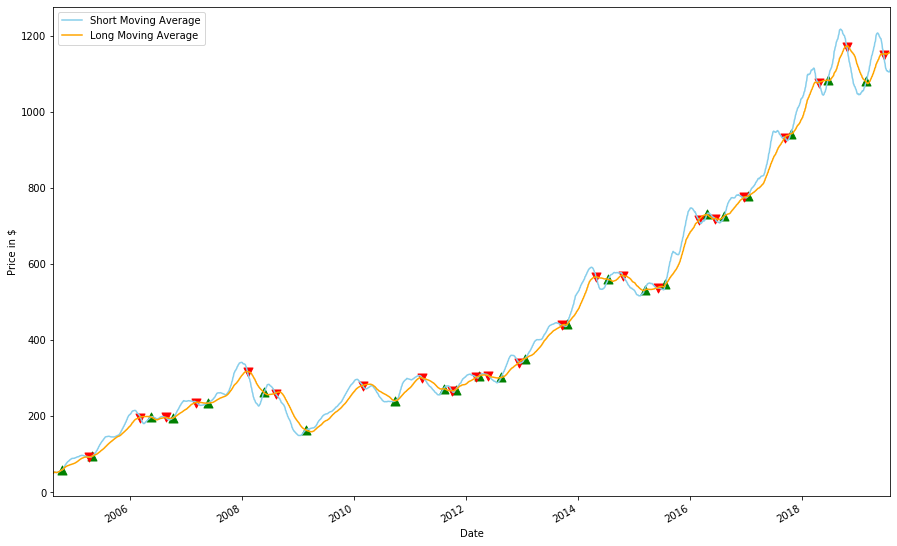

In [25]:
# Plotting short and long moving averages
signals[['Short Moving Average', 'Long Moving Average']].plot(figsize = (15, 10), color = ['skyblue', 'orange'])
plt.ylabel('Price in $')

# Plotting buy signals
plt.scatter(signals[signals['Positions'] == 1].index,
         signals[signals['Positions'] == 1]['Short Moving Average'],
         marker = '^', s = 9 ** 2, color = 'green')

# Plotting sell signals
plt.scatter(signals[signals['Positions'] == -1].index,
         signals[signals['Positions'] == -1]['Short Moving Average'],
         marker = 'v', s = 9 ** 2, color = 'red')
plt.show()

# Backtesting

Notes:
1. initial_capital: Capital (asset) at the time of investment.
2. shares: Number of shares to buy or sell at every crossover.
3. portfolio: A Pandas DataFrame to backtest SMA-CS.
4. portfolio[ticker]: Number of shares to buy when the signal is 1 (short moving average > long moving average).
5. portfolio['Diff']: Number of shares owned compared with previous day.
6. portfolio['Holdings']: Amount of money in shares.
7. portfolio['Cash']: Cash available with the user. It is calculated as:
        Initial capital - Cumulative_Sum(Number of shares owned at an instant in a day * Adjusted Closing Price at that day)
        Cumulative Sum is taken to ensure that the previous transactions are taken into account. This helps in calculating total at any instant.
8. portfolio['Total']: Holdings in shares (Liabilities) + Cash (Assets)
9. portfolio['Returns']: Returns of the investment per day.

In [32]:
# Set the initial capital
initial_capital = 1000000

# Shares to buy on the day when short moving average crosses long moving average
shares = 100

# Dataframe 'portfolio' to backtest SMA-CS
portfolio = pd.DataFrame(index = signals.index)

# Buy 'shares' on the day when short moving average crosses long moving average
portfolio[ticker] = shares * signals['Signal']

# Differences in shares owned
portfolio['Diff'] = portfolio[ticker].diff()

# Holdings of the shares
portfolio['Holdings'] = portfolio[ticker].multiply(df['Adj Close'], axis = 0)

# Cash in hand
portfolio['Cash'] = initial_capital - portfolio['Diff'].multiply(df['Adj Close']).cumsum()

# Total at an instant
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']

# Returns of stocks
portfolio['Returns'] = portfolio['Total'].pct_change()

portfolio.iloc[0:60, :]

,GOOG,Diff,Holdings,Cash,Total,Returns
Date,,,,,,
2004-08-19,0,NaN,0.000000,NaN,NaN,NaN
2004-08-20,0,0.0,0.000000,1000000.000000,1.000000e+06,NaN
2004-08-23,0,0.0,0.000000,1000000.000000,1.000000e+06,0.000000
2004-08-24,0,0.0,0.000000,1000000.000000,1.000000e+06,0.000000
2004-08-25,0,0.0,0.000000,1000000.000000,1.000000e+06,0.000000
2004-08-26,0,0.0,0.000000,1000000.000000,1.000000e+06,0.000000
2004-08-27,0,0.0,0.000000,1000000.000000,1.000000e+06,0.000000
2004-08-30,0,0.0,0.000000,1000000.000000,1.000000e+06,0.000000
2004-08-31,0,0.0,0.000000,1000000.000000,1.000000e+06,0.000000


In [ ]:
portfolio['Total'].plot(figsize = (15, 10))
plt.ylabel('Portfolio Value in $')

# Plotting buy signals
plt.scatter(portfolio[signals['Positions'] == 1].index,
            portfolio[signals['Positions'] == 1]['Total'],
            marker = '^', s = 9 ** 2, color = 'green')

# Plotting sell signals
plt.scatter(portfolio[signals['Positions'] == -1].index,
            portfolio[signals['Positions'] == -1]['Total'],
            marker = 'v', s = 9 ** 2, color = 'red')
plt.show()